# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Deploy LLM App with Ollama and Langchain in Production**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## Chat myPDF : RAG with LLAMA, LangChain, Ollama, and FAISS Vector Store
### 1. Vector Stores and Retrievals

RAG PDF Dataset: https://github.com/laxmimerit/rag-dataset

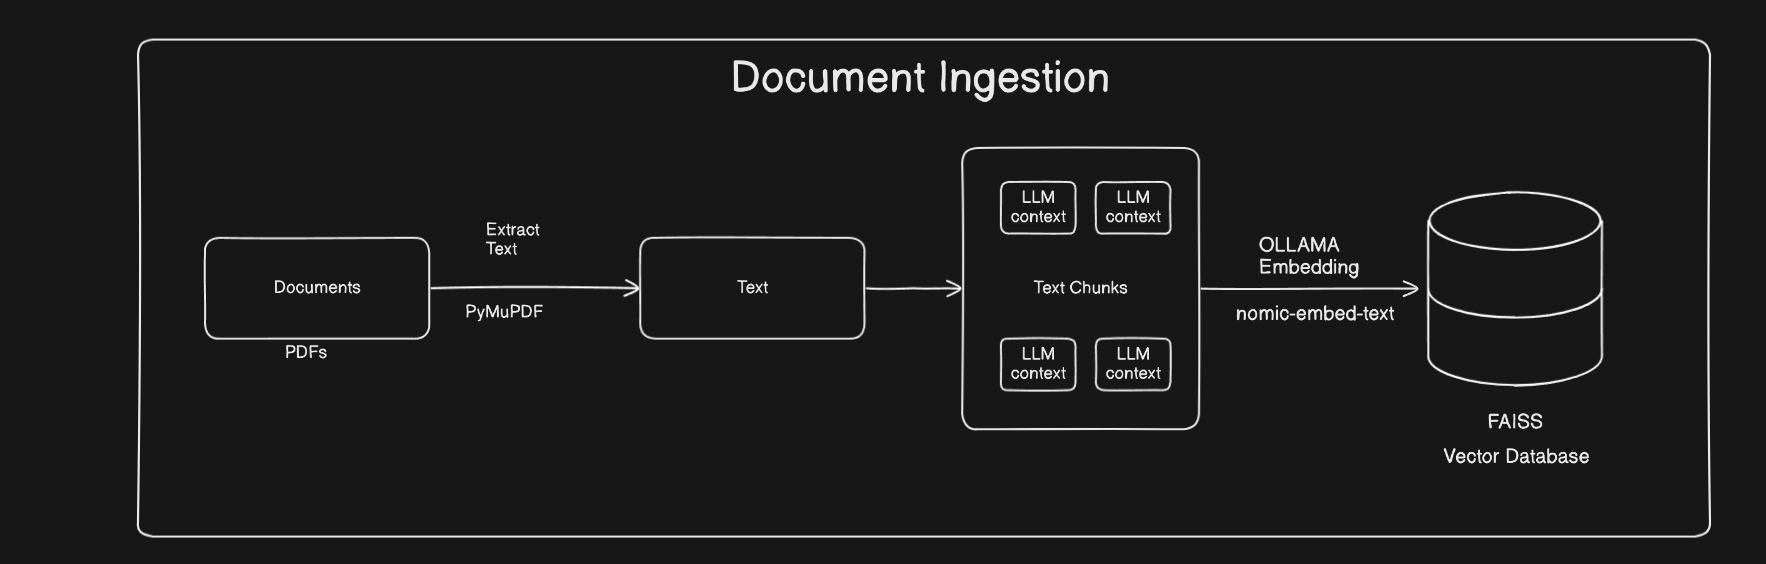

In [ ]:
# pip install faiss-cpu

In [1]:
import os
import warnings
from dotenv import load_dotenv

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
warnings.filterwarnings("ignore")

load_dotenv()

True

### Document Loader

In [2]:
### Read the list of PDFs in the dir

from langchain_community.document_loaders import PyMuPDFLoader
import os

pdfs = []
for root, dirs, files in os.walk("rag-dataset"):
    # print(root, dirs, files)
    for file in files:
        if file.endswith(".pdf"):
            pdfs.append(os.path.join(root, file))


In [3]:
docs = []
for pdf in pdfs:
    loader = PyMuPDFLoader(pdf)
    temp = loader.load()
    docs.extend(temp)

    # print(temp)
    # break

In [4]:
len(docs)

64

In [5]:
# print(docs[0].page_content)
# docs

### Document Chunking

In [7]:
from langchain_text_splitters import  RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = text_splitter.split_documents(docs)

In [12]:
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4o-mini")
len(encoding.encode(chunks[0].page_content)), len(encoding.encode(chunks[1].page_content)), len(encoding.encode(docs[1].page_content))

(294, 219, 922)

### Document Vector Embedding

In [13]:
from langchain_ollama import OllamaEmbeddings

import faiss
from langchain_community.vectorstores import FAISS 
from langchain_community.docstore.in_memory import InMemoryDocstore

In [14]:
embeddings = OllamaEmbeddings(model='nomic-embed-text', base_url='http://localhost:11434')

In [15]:
vector = embeddings.embed_query("Hello World")

In [20]:
len(vector)
index = faiss.IndexFlatL2(len(vector))
index.ntotal, index.d

(0, 768)

In [21]:
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [24]:
vector_store.index.ntotal, vector_store.index.d

(0, 768)

In [25]:
ids = vector_store.add_documents(documents=chunks)

In [26]:
len(ids), vector_store.index.ntotal

(321, 321)

In [29]:
# ids
# vector_store.index_to_docstore_id


In [31]:
### Retreival
question = "how to gain muscle mass?"
docs = vector_store.search(query=question, k=5, search_type="similarity")

In [32]:
docs

[Document(metadata={'source': 'rag-dataset\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'file_path': 'rag-dataset\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'page': 8, 'total_pages': 11, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'iLovePDF', 'creationDate': '', 'modDate': 'D:20241021113904Z', 'trapped': ''}, page_content='and strength gain among men. We detected more prevalent protein and creatine supplementation\namong younger compared to older ﬁtness center users, whereas the opposite was found for vitamin\nsupplementation. Other authors made similar observations [23] and it might reﬂect the diﬀerent\ntraining goals among age groups, i.e., more focus on strength and muscles among the younger and\nmore focus on health among the older age groups.\nComparable to other studies [4], we detected a positive correlation between training frequency\nand supplement usage. Nevertheless, the cor

In [33]:
db_name = "health_supplements"

vector_store.save_local(db_name)